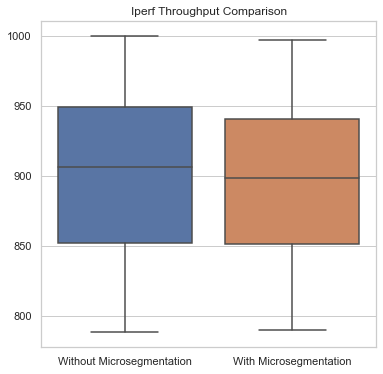

In [20]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_throughput_values(filename):
    with open(filename, 'r') as file:
        content = file.read()
        regex = r'\d+\s+Mbits/sec'
        matches = re.findall(regex, content)
        throughput_values = [float(match.split()[0]) for match in matches]
        return throughput_values

throughput_without_microsegmentation = extract_throughput_values('output_c_w.txt')
throughput_with_microsegmentation = extract_throughput_values('output_c.txt')

df = pd.DataFrame({'Without Microsegmentation': throughput_without_microsegmentation,
                   'With Microsegmentation': throughput_with_microsegmentation})

sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))
sns.boxplot(data=df)
plt.title('Iperf Throughput Comparison')
plt.savefig('iperf_comparison_boxplot3.pdf')


,Without Microsegmentation,With Microsegmentation
0,993.0,990.0
1,980.0,986.0
2,996.0,993.0
3,979.0,970.0
4,976.0,985.0
...,...,...
115,799.0,795.0
116,788.0,790.0
117,794.0,798.0
118,805.0,806.0


<AxesSubplot:>

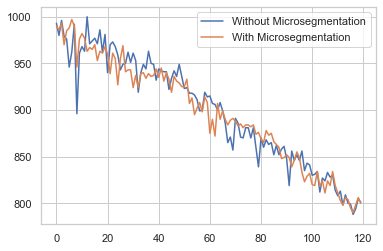

In [21]:
display(df)
df.plot()

(array([ 3.,  6.,  4.,  5.,  5.,  5., 11.,  9.,  3.,  3.,  5.,  6.,  8.,
         4., 10.,  8., 10.,  7.,  4.,  4.]),
 array([ 788. ,  798.6,  809.2,  819.8,  830.4,  841. ,  851.6,  862.2,
         872.8,  883.4,  894. ,  904.6,  915.2,  925.8,  936.4,  947. ,
         957.6,  968.2,  978.8,  989.4, 1000. ]),
 <BarContainer object of 20 artists>)

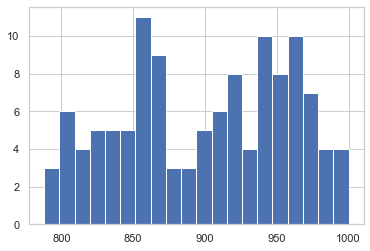

In [22]:
plt.hist(df["Without Microsegmentation"].values, bins=20)


(array([ 5.,  4.,  7.,  4.,  5.,  6.,  2.,  5.,  9., 11.,  4.,  6.,  3.,
         9., 15.,  4.,  6.,  6.,  4.,  5.]),
 array([790.  , 800.35, 810.7 , 821.05, 831.4 , 841.75, 852.1 , 862.45,
        872.8 , 883.15, 893.5 , 903.85, 914.2 , 924.55, 934.9 , 945.25,
        955.6 , 965.95, 976.3 , 986.65, 997.  ]),
 <BarContainer object of 20 artists>)

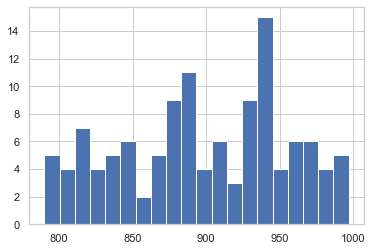

In [23]:
plt.hist(df["With Microsegmentation"].values, bins=20)

In [16]:
# indexes_to_drop = df[df['Without Microsegmentation'] < 600].index
# df = df.drop(indexes_to_drop)

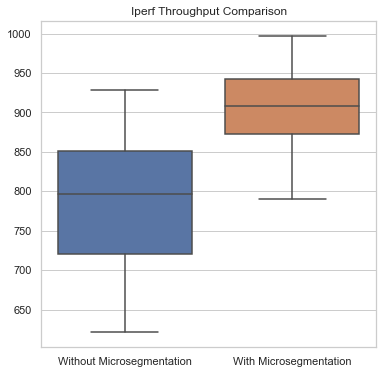

In [19]:
# sns.set(style='whitegrid')
# plt.figure(figsize=(6, 6))
# sns.boxplot(data=df)
# plt.title('Iperf Throughput Comparison')
# plt.savefig('iperf_comparison_boxplot2.pdf')